# Project tile
Multiclass Fish Image Classification

# Project type
- Supervised Learning
- Classification

# Contribution
Individual

# Project summary
- The Multiclass Fish Image Classification project focuses on building an intelligent system capable of identifying different fish species from images using deep learning techniques. This project falls under the category of Supervised Learning, as it uses labeled image data to train models for classification. The goal is to develop and deploy a robust model that can accurately predict the species of fish from a given image, ensuring scalability and practical usability in real-world scenarios such as fisheries, marine research, and the food industry.

- Problem Statement
Manually identifying fish species is time-consuming, error-prone, and requires expert knowledge. Automating this process through machine learning not only saves time but also improves accuracy and efficiency. This project addresses this problem by building a deep learning-based image classification solution that predicts the correct fish species from an input image.

- Approach
The implementation of this project involves several key phases:

1. Data Preprocessing and Augmentation
The dataset consists of fish images organized into class-wise folders, representing different species. Using TensorFlow’s ImageDataGenerator, the images are preprocessed by rescaling pixel values to a range of [0, 1] for faster convergence. Additionally, data augmentation techniques such as rotation, zoom, horizontal flip, and width/height shifts are applied to enhance dataset diversity and improve the generalization capability of the model.

2. Model Development
Two approaches are adopted for model building:

-> CNN Model from Scratch: A custom Convolutional Neural Network is designed with multiple convolutional layers, pooling layers, and dense layers for classification.

-> Transfer Learning Models: Pre-trained models like VGG16, ResNet50, MobileNet, InceptionV3, and EfficientNetB0 are fine-tuned on the fish dataset to leverage their learned features and achieve better accuracy with fewer training epochs.

3. Model Training and Evaluation
All models are trained on the training set and validated on the validation set. The performance is evaluated using metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Visualization of training history (accuracy and loss curves) helps monitor overfitting or underfitting. The best-performing model based on validation accuracy is saved in .h5 format for future use.

4. Deployment
To make the solution user-friendly and practical, the model is deployed using Streamlit, an open-source Python framework for building interactive web applications. The web app allows users to upload an image of a fish, which is then processed by the trained model to predict the species along with confidence scores.

- Tools and Technologies Used

  
 Programming Language: Python

 Libraries: TensorFlow/Keras, NumPy, Matplotlib, Streamlit

 Techniques: Convolutional Neural Networks, Transfer Learning, Data Augmentation

 Deployment: Streamlit Web Application

- Business Use Case
This solution can be highly beneficial in the fishing industry, marine biology research, and food supply chains for automating species identification, ensuring quality control, and enhancing operational efficiency. It can also be integrated into mobile apps for fishermen or seafood businesses to quickly verify species and avoid mislabeling.




# Github link
https://github.com/suji-312

# Problem statement
Manual identification of fish species is a challenging and time-consuming process that requires expert knowledge. In fisheries, marine research, and the food industry, accurate species classification is critical for inventory management, quality control, and ecological monitoring. However, human-based identification is prone to errors and inefficiencies, especially when dealing with large volumes of images.

This project aims to automate the classification of fish species using deep learning-based image classification techniques. By training a model on labeled images of different fish species, the system can accurately predict the species from a given image. The solution will enhance speed, accuracy, and scalability, reducing dependency on manual efforts and enabling real-time predictions through a web application.



# Load & Preprocess Data

In [5]:
#Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

print("Train path:", train_dir)


Mounted at /content/drive
Train path: /content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/train


In [7]:
import os
from PIL import Image, UnidentifiedImageError

train_dir = "/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            try:
                img = Image.open(file_path)
                if img.mode != "RGB":
                    img = img.convert("RGB")
            except UnidentifiedImageError:
                print(f"Skipping corrupted or invalid image: {file_path}")
            except Exception as e:
                print(f"Error with file {file_path}: {e}")




In [8]:
import os
from PIL import Image, UnidentifiedImageError

def clean_dataset(root_dir):
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Checks if it's a valid image
            except (UnidentifiedImageError, OSError):
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)

# Run for both train and validation folders
clean_dataset("/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/train")
clean_dataset("/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/val")


In [9]:
#ImageDataGenerator for Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
#Create Generators
img_size = (225, 225)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 6224 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [11]:
#Check Classes
print("Classes:", train_generator.class_indices)

Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


#  Build CNN


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [13]:
#Build the CNN Architecture
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))


# Compile the Model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#  Train the Model

In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 111s 528ms/step - accuracy: 0.2449 - loss: 2.1830 - val_accuracy: 0.3984 - val_loss: 1.6004
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 496ms/step - accuracy: 0.4121 - loss: 1.5891 - val_accuracy: 0.5916 - val_loss: 1.1181
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 490ms/step - accuracy: 0.5281 - loss: 1.2663 - val_accuracy: 0.6804 - val_loss: 0.8803
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 491ms/step - accuracy: 0.6454 - loss: 0.9689 - val_accuracy: 0.7170 - val_loss: 0.7456
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 504ms/step - accuracy: 0.6758 - loss: 0.8908 - val_accuracy: 0.8315 - val_loss: 0.5460
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step - accuracy: 0.7188 - loss: 0.7816 - val_accuracy: 0.8562 - val_loss: 0.4708
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 502ms/step - accuracy: 0.7369 - loss: 0.6929 - val_accuracy: 0.8471 - val_loss: 0.4750
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 491ms/step - accuracy: 0.7659 - loss

# Visualize Training Progress

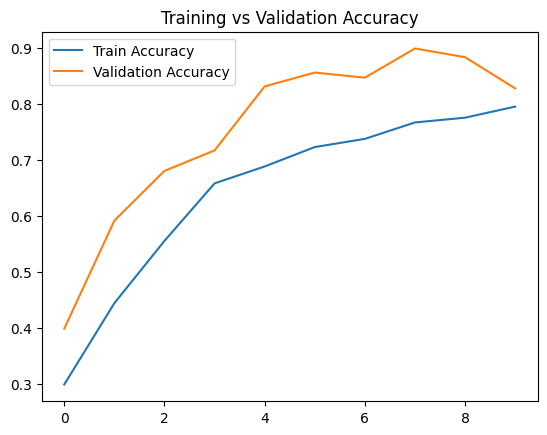

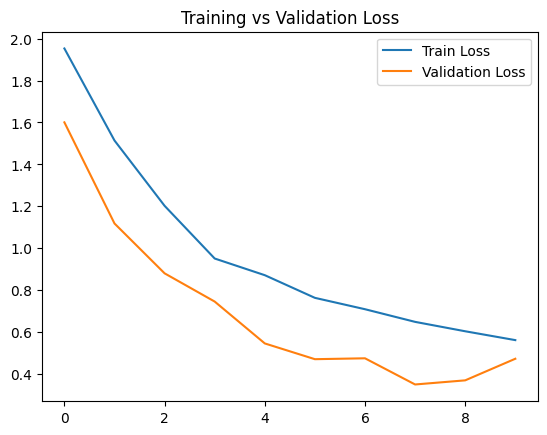

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Transfer Learning Models

In [17]:
#Import Pre-trained Model and Layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout


#   VGG16 Implementation

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(225,225,3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=output)

# Compile model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(train_generator, epochs=5, validation_data=val_generator)


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 615ms/step - accuracy: 0.3136 - loss: 2.0079 - val_accuracy: 0.7051 - val_loss: 1.1823
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 563ms/step - accuracy: 0.6633 - loss: 1.1348 - val_accuracy: 0.8233 - val_loss: 0.7306
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 553ms/step - accuracy: 0.7495 - loss: 0.8164 - val_accuracy: 0.8700 - val_loss: 0.5455
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 105s 537ms/step - accuracy: 0.7829 - loss: 0.6659 - val_accuracy: 0.8736 - val_loss: 0.4366
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 556ms/step - accuracy: 0.8219 - loss: 0.5706 - val_accuracy: 0.9038 - val_loss: 0.3543


# ResNet50 Implementation

In [20]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(225,225,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet = model_resnet.fit(train_generator, epochs=5, validation_data=val_generator)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 124s 569ms/step - accuracy: 0.1461 - loss: 2.4288 - val_accuracy: 0.1712 - val_loss: 2.2942
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 496ms/step - accuracy: 0.1633 - loss: 2.3108 - val_accuracy: 0.1712 - val_loss: 2.2798
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.1645 - loss: 2.2758 - val_accuracy: 0.1712 - val_loss: 2.2645
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 499ms/step - accuracy: 0.1724 - loss: 2.2619 - val_accuracy: 0.1712 - val_loss: 2.2483
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 504ms/step - accuracy: 0.1771 - loss: 2.2422 - val_accuracy: 0.1740 - val_loss: 2.2354


# MobileNetV2 Implementation

In [21]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(225,225,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=base_model.input, outputs=output)

model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mobilenet = model_mobilenet.fit(train_generator, epochs=5, validation_data=val_generator)


/tmp/ipython-input-1415046109.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(225,225,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 116s 545ms/step - accuracy: 0.6630 - loss: 1.0874 - val_accuracy: 0.9689 - val_loss: 0.1512
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 122s 476ms/step - accuracy: 0.9307 - loss: 0.2302 - val_accuracy: 0.9780 - val_loss: 0.0894
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.9525 - loss: 0.1598 - val_accuracy: 0.9844 - val_loss: 0.0611
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 488ms/step - accuracy: 0.9644 - loss: 0.1093 - val_accuracy: 0.9863 - val_loss: 0.0456
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 140s 480ms/step - accuracy: 0.9686 - loss: 0.1081 - val_accuracy: 0.9872 - val_loss: 0.0430


#  InceptionV3 Implementation

In [22]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(225,225,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_inception = Model(inputs=base_model.input, outputs=output)

model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_inception = model_inception.fit(train_generator, epochs=5, validation_data=val_generator)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 596ms/step - accuracy: 0.5559 - loss: 1.3750 - val_accuracy: 0.9258 - val_loss: 0.2653
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 505ms/step - accuracy: 0.8411 - loss: 0.4786 - val_accuracy: 0.9551 - val_loss: 0.1606
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 497ms/step - accuracy: 0.8829 - loss: 0.3440 - val_accuracy: 0.9588 - val_loss: 0.1536
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.8992 - loss: 0.3158 - val_accuracy: 0.9634 - val_loss: 0.1265
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 504ms/step - accuracy: 0.9091 - loss: 0.2635 - val_accuracy: 0.9652 - val_loss: 0.1199


# EfficientNetB0 Implementation

In [23]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(225,225,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_effnet = Model(inputs=base_model.input, outputs=output)

model_effnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_effnet = model_effnet.fit(train_generator, epochs=5, validation_data=val_generator)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 606ms/step - accuracy: 0.1390 - loss: 2.3906 - val_accuracy: 0.1712 - val_loss: 2.3167
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 493ms/step - accuracy: 0.1761 - loss: 2.3119 - val_accuracy: 0.1712 - val_loss: 2.3088
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 497ms/step - accuracy: 0.1804 - loss: 2.3057 - val_accuracy: 0.1712 - val_loss: 2.3097
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 497ms/step - accuracy: 0.1812 - loss: 2.3028 - val_accuracy: 0.1712 - val_loss: 2.3107
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 498ms/step - accuracy: 0.1732 - loss: 2.3064 - val_accuracy: 0.1712 - val_loss: 2.3110


# Plot Accuracy and Loss for Each Model

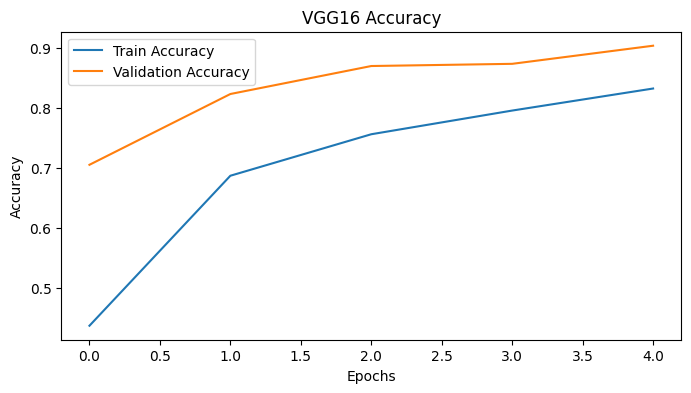

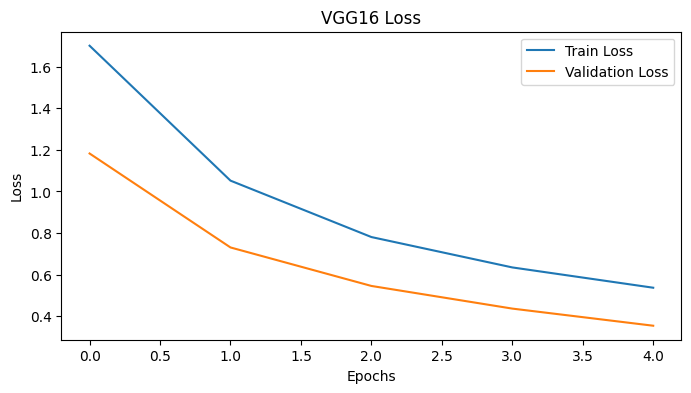

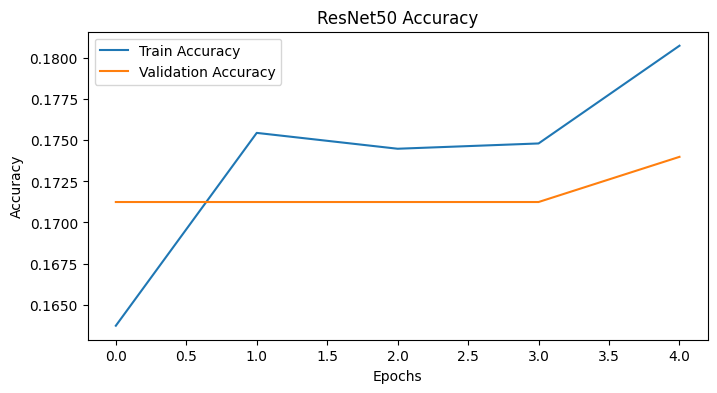

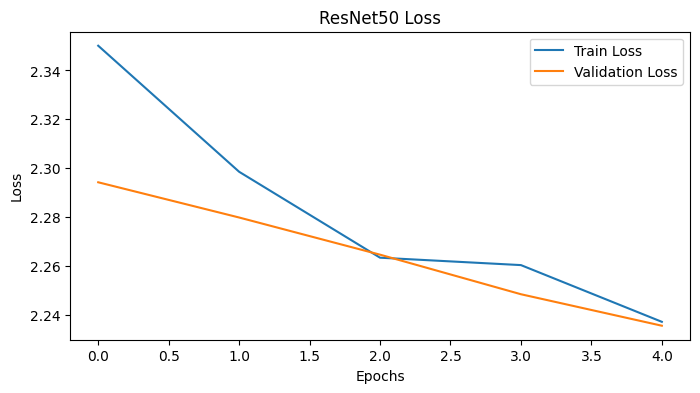

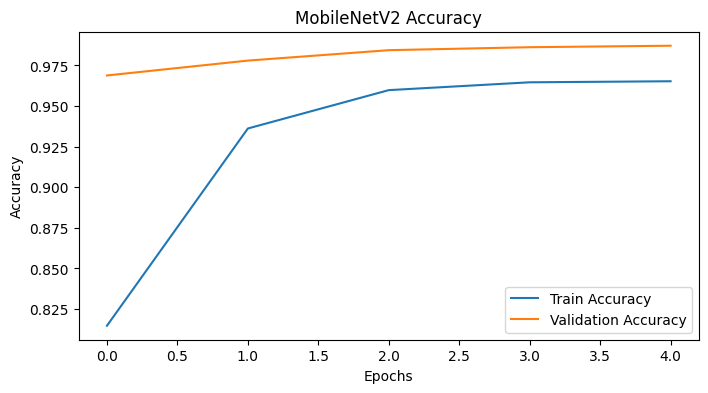

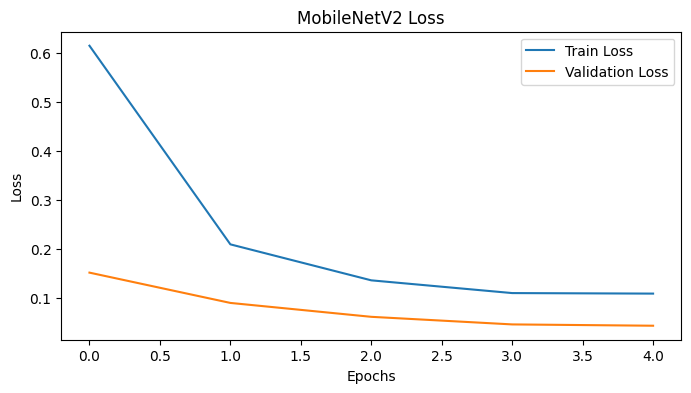

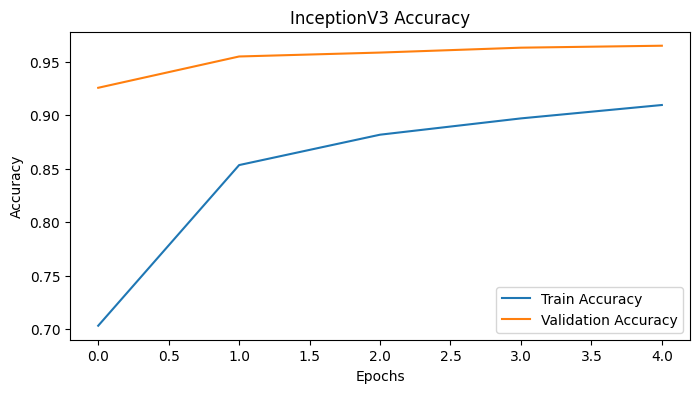

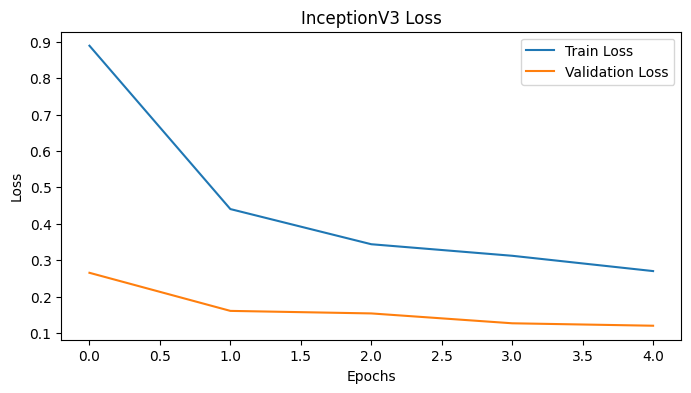

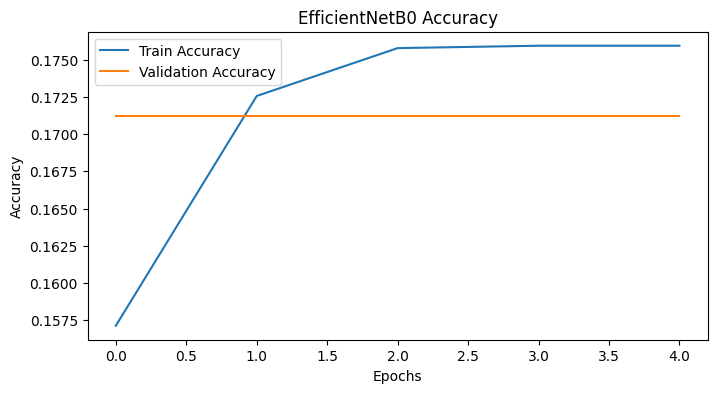

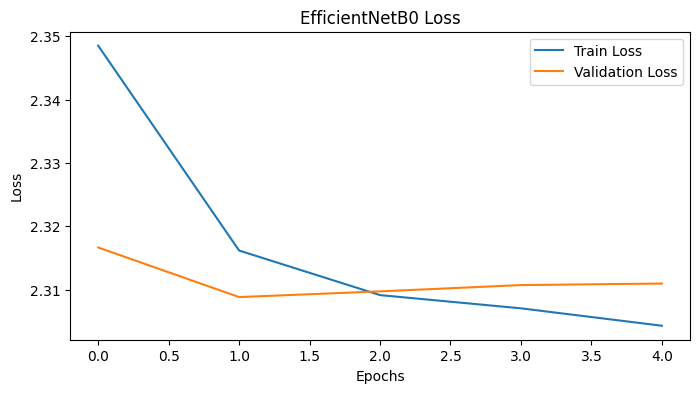

In [24]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    # Plot Accuracy
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Loss
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call for all models
plot_training_history(history_vgg, 'VGG16')
plot_training_history(history_resnet, 'ResNet50')
plot_training_history(history_mobilenet, 'MobileNetV2')
plot_training_history(history_inception, 'InceptionV3')
plot_training_history(history_effnet, 'EfficientNetB0')


# Compare Final Validation Accuracies



In [25]:
results = {
    'Model': ['VGG16', 'ResNet50', 'MobileNetV2', 'InceptionV3', 'EfficientNetB0'],
    'Val Accuracy': [
        history_vgg.history['val_accuracy'][-1],
        history_resnet.history['val_accuracy'][-1],
        history_mobilenet.history['val_accuracy'][-1],
        history_inception.history['val_accuracy'][-1],
        history_effnet.history['val_accuracy'][-1]
    ]
}

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


            Model  Val Accuracy
0           VGG16      0.903846
1        ResNet50      0.173993
2     MobileNetV2      0.987179
3     InceptionV3      0.965201
4  EfficientNetB0      0.171245


#  Confusion Matrix & Classification Report

100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       304
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy                           0.16      3186
                       macro avg    

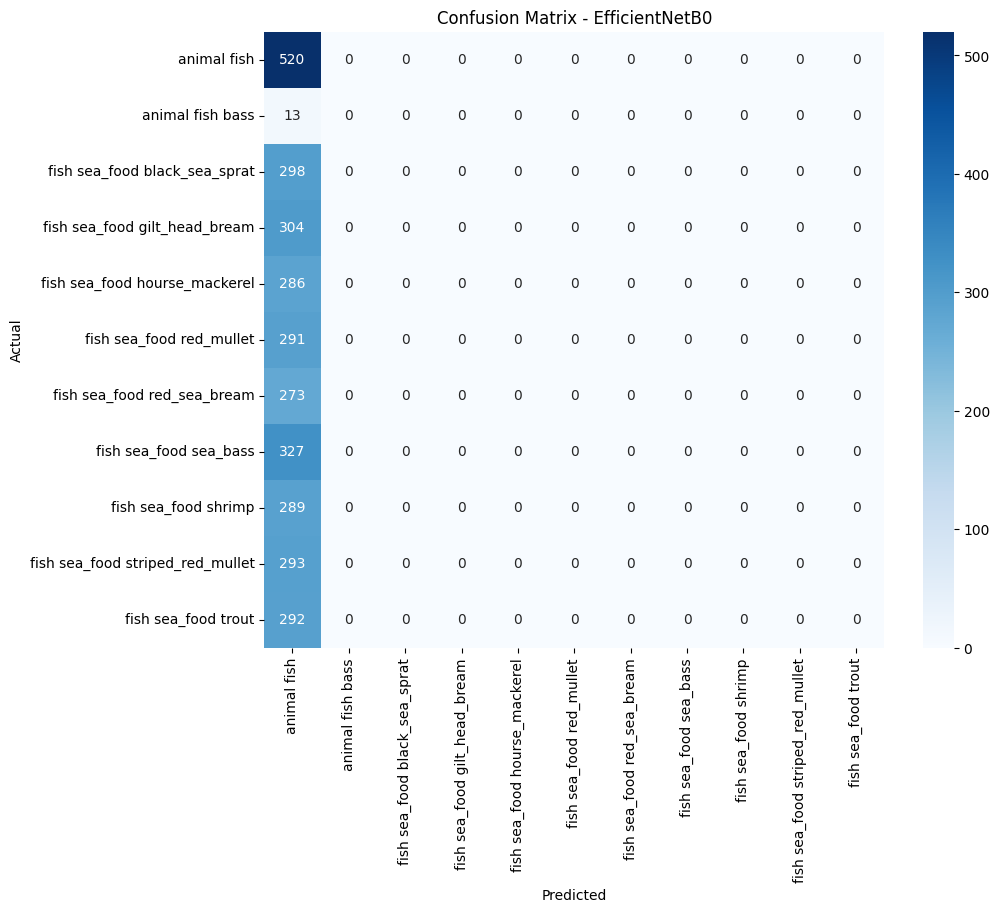

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict on test set
y_true = test_generator.classes
y_pred = model_effnet.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - EfficientNetB0')
plt.show()


In [27]:
import os
from PIL import Image, UnidentifiedImageError

def clean_image_folder(folder_path):
    bad_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Check if it's a real image
                # Optional: convert to RGB
                img = Image.open(file_path).convert("RGB")
            except (UnidentifiedImageError, OSError) as e:
                print(f"Removing corrupted image: {file_path} ({e})")
                bad_files.append(file_path)
                os.remove(file_path)
    print(f"Cleaned {len(bad_files)} bad files from {folder_path}")

# Run for all sets
clean_image_folder("/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/train")
clean_image_folder("/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/val")
clean_image_folder("/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/test")


Cleaned 0 bad files from /content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/train
Cleaned 0 bad files from /content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/val
Removing corrupted image: /content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food gilt_head_bream/DA504MZSBNYR.jpg (cannot identify image file '/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food gilt_head_bream/DA504MZSBNYR.jpg')
Cleaned 1 bad files from /content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/test


In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Fishclassification/images.cv_jzk6llhf18tm3k0kyttxz/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3186 images belonging to 11 classes.


In [30]:
y_true = test_generator.classes
y_pred = model_effnet.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step


In [32]:
model_effnet.save('efficientnet_fish_classifier.keras')

In [34]:
model = tf.keras.models.load_model('efficientnet_fish_classifier.keras')


In [35]:
from google.colab import files
files.download('efficientnet_fish_classifier.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>